In [36]:
import pandas as pd
import numpy as np
import os

# 경고 메세지 off
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
# from matplotlib import font_manager, rc # 폰트 설정과 한글깨짐 방기
# font_path = "C:/Windows/Fonts/NGULIM.TTF"
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)

from sklearn.metrics import silhouette_score # 성능 지표를 계산하기 위해 silhouette_score import\
import seaborn as sns
sns.set_style("darkgrid")
SEED=23

In [37]:
# Data load
address = './../data_processing/Dataset/'
data = pd.read_csv(os.path.join(address,'df_pm10_7day_result_1110.csv'), header = 0, encoding='cp949')
data.head()

,in_serial,in_id,time_day,in_pm10_day
0,요양원,ICL1L2000011,2020-07-22 00:00:00,21.5
1,요양원,ICL1L2000011,2020-07-22 00:10:00,22.3
2,요양원,ICL1L2000011,2020-07-22 00:20:00,21.8
3,요양원,ICL1L2000011,2020-07-22 00:30:00,21.5
4,요양원,ICL1L2000011,2020-07-22 00:40:00,21.5


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153211 entries, 0 to 153210
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   in_serial    153211 non-null  object 
 1   in_id        153211 non-null  object 
 2   time_day     153211 non-null  object 
 3   in_pm10_day  152785 non-null  float64
dtypes: float64(1), object(3)
memory usage: 4.7+ MB


In [39]:
# in_serial = 장소 정보와 in_id =data sample id만 data_cd로 생성
data_cd = data[['in_serial','in_id']]
data_cd = data_cd.drop_duplicates()
data_cd = data_cd.set_index(keys='in_id')

In [40]:
# 클러스터링을 진행하기 위해 data table 형태 변환
df_pivot = pd.DataFrame()
for in_data_cd in data['in_id'].unique():
    sample = data[data['in_id'] == in_data_cd]
    time_index = []
    for i in range(0,len(sample)):
        time_index.append(i)
    sample['time_index'] = time_index
    df_pivot = pd.concat([df_pivot,sample], ignore_index=True)

In [41]:
df_pivot

,in_serial,in_id,time_day,in_pm10_day,time_index
0,요양원,ICL1L2000011,2020-07-22 00:00:00,21.5,0
1,요양원,ICL1L2000011,2020-07-22 00:10:00,22.3,1
2,요양원,ICL1L2000011,2020-07-22 00:20:00,21.8,2
3,요양원,ICL1L2000011,2020-07-22 00:30:00,21.5,3
4,요양원,ICL1L2000011,2020-07-22 00:40:00,21.5,4
...,...,...,...,...,...
153206,요양원,IS70W2000858,2021-04-29 23:10:00,11.1,1003
153207,요양원,IS70W2000858,2021-04-29 23:20:00,10.6,1004
153208,요양원,IS70W2000858,2021-04-29 23:30:00,11.1,1005
153209,요양원,IS70W2000858,2021-04-29 23:40:00,9.8,1006


In [42]:
df_pivot= df_pivot.pivot_table(index="time_index", columns="in_id", values="in_pm10_day")

In [43]:
df_pivot

in_id,ICL1L2000011,ICL1L2000017,ICL1L2000064,ICL1L2000065,ICL1L2000234,ICL1L2000235,ICL1L2000236,ICL1L2000237,ICL1L2000238,ICL1L2000239,...,ICW0W2100277,ICW0W2100278,IS70W2000822,IS70W2000851,IS70W2000852,IS70W2000853,IS70W2000854,IS70W2000855,IS70W2000856,IS70W2000858
time_index,,,,,,,,,,,,,,,,,,,,,
0,21.5,11.4,15.3,16.2,43.3,29.1,18.6,23.5,61.0,52.7,...,3.0,3.2,98.97,9.9,5.0,5.9,0.7,8.7,14.1,12.6
1,22.3,11.3,15.2,16.2,43.5,28.8,18.5,23.3,60.9,52.5,...,3.2,3.8,98.94,8.5,5.0,6.2,1.0,9.5,14.6,12.2
2,21.8,11.3,16.1,16.6,42.5,27.8,18.6,23.7,60.6,52.5,...,3.4,3.3,98.76,8.2,4.4,6.0,0.7,8.9,13.8,12.3
3,21.5,11.5,14.5,16.7,41.9,27.0,19.0,23.6,60.4,52.6,...,3.4,3.7,98.42,8.2,4.5,5.6,0.8,9.0,13.1,12.2
4,21.5,11.1,16.9,16.9,42.2,27.5,18.5,23.8,60.2,52.0,...,3.6,3.8,98.59,6.9,5.4,5.6,0.7,6.9,11.7,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,3.8,3.3,19.3,13.8,37.1,10.8,38.4,0.0,13.6,42.3,...,11.2,10.9,98.03,3.0,5.0,5.9,1.2,1.2,5.1,11.1
1004,4.0,3.6,19.8,14.0,37.5,10.8,39.0,0.2,14.6,42.5,...,11.0,11.0,98.00,2.6,5.0,6.4,1.0,1.6,5.3,10.6
1005,3.9,4.1,21.8,14.7,37.1,10.0,39.7,0.2,14.9,43.2,...,11.1,11.1,98.18,2.2,5.6,7.2,0.9,1.2,5.0,11.1


#  1일 데이터로 자르기

In [44]:
# 1일 데이터 = df_pivot2
df_pivot_1day = df_pivot.loc[:143]
df_pivot_1day

in_id,ICL1L2000011,ICL1L2000017,ICL1L2000064,ICL1L2000065,ICL1L2000234,ICL1L2000235,ICL1L2000236,ICL1L2000237,ICL1L2000238,ICL1L2000239,...,ICW0W2100277,ICW0W2100278,IS70W2000822,IS70W2000851,IS70W2000852,IS70W2000853,IS70W2000854,IS70W2000855,IS70W2000856,IS70W2000858
time_index,,,,,,,,,,,,,,,,,,,,,
0,21.5,11.4,15.3,16.2,43.3,29.1,18.6,23.5,61.0,52.7,...,3.0,3.2,98.97,9.9,5.0,5.9,0.7,8.7,14.1,12.6
1,22.3,11.3,15.2,16.2,43.5,28.8,18.5,23.3,60.9,52.5,...,3.2,3.8,98.94,8.5,5.0,6.2,1.0,9.5,14.6,12.2
2,21.8,11.3,16.1,16.6,42.5,27.8,18.6,23.7,60.6,52.5,...,3.4,3.3,98.76,8.2,4.4,6.0,0.7,8.9,13.8,12.3
3,21.5,11.5,14.5,16.7,41.9,27.0,19.0,23.6,60.4,52.6,...,3.4,3.7,98.42,8.2,4.5,5.6,0.8,9.0,13.1,12.2
4,21.5,11.1,16.9,16.9,42.2,27.5,18.5,23.8,60.2,52.0,...,3.6,3.8,98.59,6.9,5.4,5.6,0.7,6.9,11.7,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,40.0,13.4,41.7,16.7,23.5,3.0,58.9,19.1,64.7,24.0,...,8.7,7.5,96.94,2.0,3.0,1.3,7.2,0.8,3.8,7.3
140,39.2,13.4,41.1,16.9,23.7,2.8,57.8,19.6,65.3,22.3,...,8.1,7.8,96.91,1.8,3.0,1.6,6.9,0.7,2.6,6.8
141,45.4,13.1,40.5,17.0,23.0,2.7,57.5,19.4,65.0,22.0,...,8.6,7.1,97.21,2.2,2.4,2.0,7.4,0.7,4.1,6.2


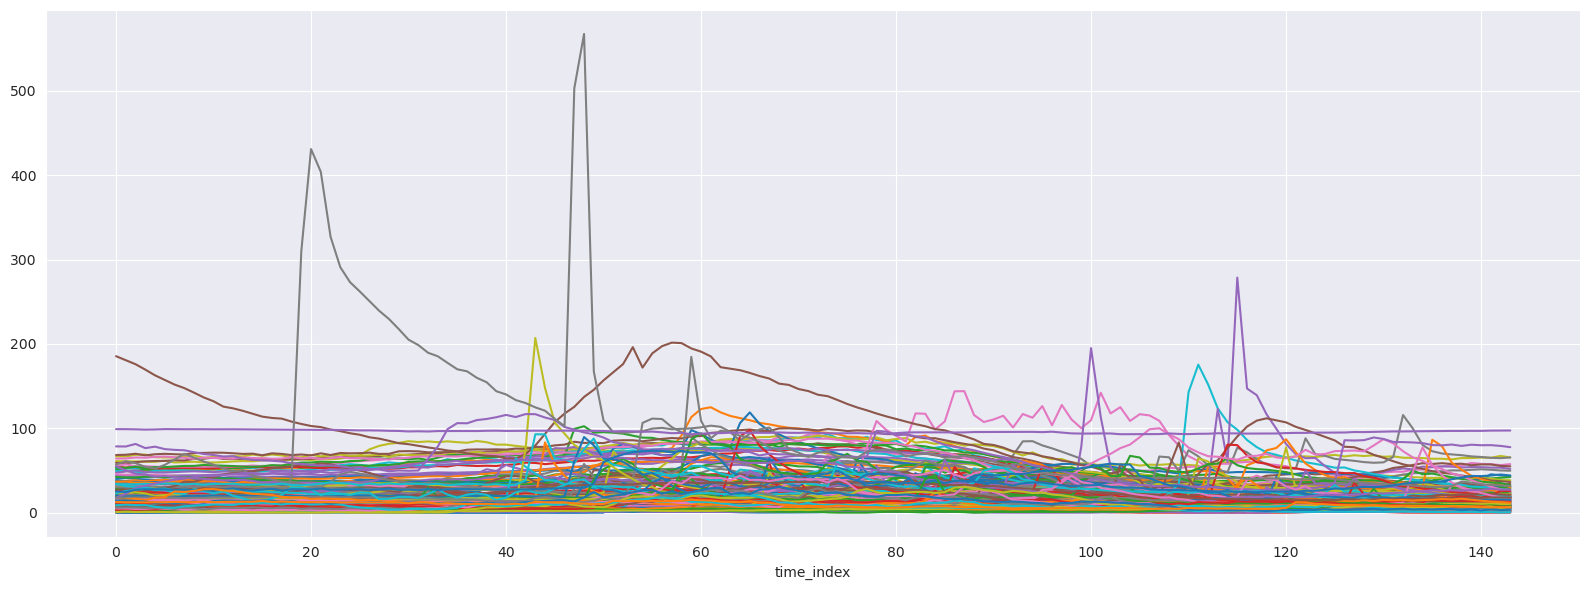

In [54]:
df_pivot_1day.plot(legend = False, figsize=(16,6))
plt.tight_layout()

In [13]:
# 데이터의 결측값 확인
x = df_pivot_1day[['ICW0W2000013', 'ICW0W2000016','ICW0W2000015']]
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ICW0W2000013  134 non-null    float64
 1   ICW0W2000016  144 non-null    float64
 2   ICW0W2000015  144 non-null    float64
dtypes: float64(3)
memory usage: 4.5 KB


In [14]:

# 선형보간법 사용
df_pivot_int = df_pivot_1day.interpolate(method='linear') 
# 데이터 가장 앞 부분에 존재하는 결측값은 이전 값으로 대체함
#df_pivot_int_test = df_pivot_int.reindex(df_pivot_int.index, method="ffill")
# 데이터 가장 끝부분에 존재하는 결측값은 이전 값으로 대체함
#df_pivot_int_test = df_pivot_int.reindex(df_pivot_int.index, method="bfill")
print("NaN processing (count):", np.isnan(df_pivot_1day.values).sum(), "->", np.isnan(df_pivot_int_test.values).sum())

In [60]:
# Pivot Table
series_df = df_pivot_int_test.T
series_df = series_df.dropna(axis='columns')
series_df.head()

NaN processing (count): 45 -> 0


In [62]:
# Scaling
from sklearn.preprocessing import StandardScaler # 데이터 정규화에 사용할 StandardScaler import
scaler = StandardScaler() # StandardScaler 정규화 객체 생성

scaled_ts = scaler.fit_transform(series_df.T).T # df_pivot에 대해 정규화를 진행함
scaled_ts_df = pd.DataFrame(scaled_ts)

In [68]:
namesofMySeries = list(series_df.index)
len(namesofMySeries)

152

In [27]:
def get_kmeans_results(data, max_clusters=10, metric='euclidean', seed=23):
    from tqdm.autonotebook import tqdm # loop의 진행상황을 시각적으로 표현하기 위한 라이브러리
    """
    KMeans 실행 과 결과 시각화

    data: pd.DataFrame or np.array
        Time Series Data
    max_clusters: int
        Number of different clusters for KMeans algorithm
    metric: str
        Distance metric between the observations
    seed: int
        random seed
    Returns: 
    -------
    None      
    """
    # Main metrics
    distortions = []
    silhouette = []
    clusters_range = range(1, max_clusters+1)
    from tslearn.clustering import TimeSeriesKMeans # TimeSeriesKMeans 클러스터링 import
    for K in tqdm(clusters_range):
        kmeans_model = TimeSeriesKMeans(n_clusters=K, metric=metric, n_jobs=-1, max_iter=10, random_state=seed)
        kmeans_model.fit(data)
        distortions.append(kmeans_model.inertia_)
        if K > 1:
            silhouette.append(silhouette_score(data, kmeans_model.labels_))
        
    # Visualization
    plt.figure(figsize=(10,4))
    plt.plot(clusters_range, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    
    plt.figure(figsize=(10,4))
    plt.plot(clusters_range[1:], silhouette, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette');

In [28]:
 def plot_cluster_ts(current_cluster):
    """
    시계열 클러스터 결과 선 그래프로 시각화

    current_cluster: np.array
        Cluster with time series 
    Returns:
    -------
    None 
    """
    Cluster_idx=[]
    fig, ax = plt.subplots(
        int(np.ceil(current_cluster.shape[0]/4)),4,
        figsize=(45, 3*int(np.ceil(current_cluster.shape[0]/4)))
    )
    fig.autofmt_xdate(rotation=45)
    ax = ax.reshape(-1)
    for i in range(len(current_cluster)):
        ax[i].plot(current_cluster.iloc[i,:])
        plt.xticks(rotation=45)
        Cluster_idx.append(current_cluster.index[i])
        
    plt.tight_layout()
    plt.show()
    print(Cluster_idx);

In [29]:
# DTW algorithm을 사용하여 TimeSeriesKMeans 진행
get_kmeans_results(data=scaled_ts_df, max_clusters=10, metric='dtw', seed=SEED)

ModuleNotFoundError: No module named 'tqdm'

In [ ]:
# in_id의 군집결과 조회
cluster_model = TimeSeriesKMeans(n_clusters=5, metric='dtw', n_jobs=-1, max_iter=10, random_state=SEED) # k를 5로 설정하여 결과 조회함
cluster_labels = cluster_model.fit_predict(scaled_ts_df)
fancy_names_for_labels = [f"Cluster {label}" for label in cluster_labels]
result = pd.DataFrame(zip(namesofMySeries,fancy_names_for_labels),columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")

ts_clustered = [scaled_ts_df.iloc[(cluster_labels == lable), :] for lable in np.unique(cluster_labels)]

result

In [ ]:
# 군집별 data sample 수 조회
merge_outer = pd.merge(result,data_cd, how='outer', left_index=True, right_index=True)
result_cnt = merge_outer.groupby('Cluster').count().reset_index()
result_cnt

In [ ]:
# 군집별 data sample 형태 조회
for cluster in range(len(ts_clustered)):
    print(f"==========Cluster number: {cluster}==========")
    plot_cluster_ts(ts_clustered[cluster])


In [ ]:
def get_DBSCAN_parameter(data, eps_values = np.arange(3,8.75,0.25), min_samples = np.arange(3,10)):
    from sklearn.cluster import DBSCAN # DBSCAN 클러스터링 import
    """
    DBSCAN parameter 탐색 code

    data: pd.DataFrame or np.array
        Time Series Data

    eps_values: np.arange
        eps of DBSCAN
        # eps values to be investigated

    min_samples: np.arange
        min_sample of DBSCAN
        # min_samples values to be investigated
    Returns:
    -------
    None
    """
    from itertools import product # 효율적으로 loop를 생성하기 위한 라이브러리
    DBSCAN_params = list(product(eps_values, min_samples))

    no_of_clusters = []
    sil_score = []
    noise = []
    eps = []
    min_sample = []

    for p in DBSCAN_params:
        DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(data)
        clusters = DBS_clustering.labels_
        n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
        n_noise_ = list(clusters).count(-1)

        if n_clusters_ > 1:
            eps.append(p[0])
            min_sample.append(p[1])
            noise.append(n_noise_)
            no_of_clusters.append(n_clusters_)
            sil_score.append(silhouette_score(data, clusters))


    dict = {'Eps': eps,'Min_samples': min_sample}
    tmp= pd.DataFrame(dict)
    #######################################No_of_clusters############################################################
    tmp['No_of_clusters'] = no_of_clusters
    pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

    fig, ax = plt.subplots(figsize=(12,6))
    sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
    ax.set_title('Number of clusters')
    plt.show()

    ###########################################Sil_score########################################################
    tmp['Sil_score'] = sil_score
    pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

    fig, ax = plt.subplots(figsize=(18,6))
    sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax, fmt = '.3f')
    ax.set_title('Sil score')
    plt.show()

    ###########################################Noise########################################################
    tmp['Noise'] = noise
    pivot_1 = pd.pivot_table(tmp, values='Noise', index='Min_samples', columns='Eps')

    fig, ax = plt.subplots(figsize=(18,6))
    sns.heatmap(pivot_1, annot=True, annot_kws={"size": 16}, cmap="YlGnBu", ax=ax, fmt = '.1f')
    ax.set_title('Noise')
    plt.show()



In [ ]:
# DBSCAN을 eps_values 범위와 min_samples로 각각 진행하여 클러스터 수와 Sil_score, Noise 결과 시각화
get_DBSCAN_parameter(scaled_ts_df, eps_values = np.arange(5,10,0.25), min_samples = np.arange(3,15))

In [ ]:
def get_DBSCAN_results(data, min_samples=10, eps = 0.726):
    """
    파라미터를 지정하여 DBSCAN 결과 생성

    data: pd.DataFrame or np.array
        Time Series Data
    min_samples: int
        # 최소 요소 갯수
    eps: int
        # R와 역할, 반지름 지정

    Returns:
    -------
    None
    """
    # Main metrics

    DBSCAN_model = DBSCAN(eps=eps, min_samples = min_samples)
    DBSCAN_model.fit(data)
    clusters_ss= DBSCAN_model.fit_predict(data)
    clusters = DBSCAN_model.labels_
    n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
    n_noise_ = list(clusters).count(-1)


    core_samples = np.zeros_like(clusters, dtype=bool)
    core_samples[DBSCAN_model.core_sample_indices_] = True
    #print("Number of core samples:", core_samples)


    print("Number of clusters: %d" % n_clusters_)
    print("Number of noise points: %d" % n_noise_)
    for i in range(n_clusters_):
        print('Cluster', i, ':', len(clusters[clusters==i]))

    print("Silhouette Coefficient: %0.3f" % silhouette_score(data, clusters))



In [ ]:
# min_samples=12, eps = 8.5의 DBSCAN 결과
get_DBSCAN_results(data = scaled_ts_df , min_samples=12, eps = 8.5)

In [ ]:
# in_id의 군집결과 조회
cluster_model = DBSCAN(min_samples=12, eps = 8.5)
cluster_labels = cluster_model.fit_predict(scaled_ts_df)
fancy_names_for_labels = [f"Cluster {label}" for label in cluster_labels]
result = pd.DataFrame(zip(namesofMySeries,fancy_names_for_labels),columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")
ts_clustered = [scaled_ts_df.iloc[(cluster_labels == lable), :] for lable in np.unique(cluster_labels)]
result

In [ ]:
# 군집별 data sample 수 조회
merge_outer = pd.merge(result,data_cd, how='outer', left_index=True, right_index=True)
result_cnt = merge_outer.groupby('Cluster').count().reset_index()
result_cnt

## clustering 결과 시각화

In [ ]:
# cluster_model = DBSCAN(min_samples=12, eps = 8.5)

for cluster in range(len(ts_clustered)):
    print(f"==========Cluster number: {cluster}==========")
    plot_cluster_ts(ts_clustered[cluster])

## clustering 결과 라벨링

In [ ]:
pm10_clustering_result= df_pivot_int_test.T.copy()
pm10_clustering_result = pm10_clustering_result.reset_index()

In [ ]:
# 클러스터 결과와 input data set을 merge 하여 예측을 위한 data set 생성
result = result.reset_index()
test = pd.merge(pm10_clustering_result,result, how='left', left_on='in_id', right_on='Series')

In [ ]:
PM10_clustering_result = test.drop(["Series"], axis=1)

In [ ]:
PM10_clustering_result.head()

In [ ]:
# 클러스터링 결과 csv 저장
address = './../data_processing/Dataset/'
test.to_csv(os.path.join(address,'PM10_clustering_1day_result.csv'), encoding="cp949", index=False)